In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
path= ('/content/drive/MyDrive/Colab Notebooks/CSE5317-DataMining-HW/Combined_GeneData_4_Classification.csv')
classification_data= pd.read_csv(path)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
classification_data = classification_data.drop('Samples', axis=1)

missing_values_count = classification_data.isnull().sum().sum()
print("missing_values_count",missing_values_count)

X = classification_data.drop('Disease State', axis=1)
y = classification_data['Disease State']


missing_values_count 0


In [ ]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((26, 44), (7, 44))

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

nn_2_hidden = MLPClassifier(hidden_layer_sizes=(100, 50), random_state=42)

cv_scores_nn_2_hidden = cross_val_score(nn_2_hidden, X_scaled, y, cv=10)

for i, score in enumerate(cv_scores_nn_2_hidden, 1):
    print(f"Accuracy for fold {i}: {score:.2f}")

mean_accuracy = np.mean(cv_scores_nn_2_hidden)
print(f"Mean Accuracy: {mean_accuracy:.2f}")

Accuracy for fold 1: 0.75
Accuracy for fold 2: 0.75
Accuracy for fold 3: 1.00
Accuracy for fold 4: 1.00
Accuracy for fold 5: 0.67
Accuracy for fold 6: 0.33
Accuracy for fold 7: 0.67
Accuracy for fold 8: 1.00
Accuracy for fold 9: 1.00
Accuracy for fold 10: 0.67
Mean Accuracy: 0.78


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

nn_custom = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    activation='tanh',
    solver='adam',
    random_state=42
)

cv_scores = cross_val_score(nn_custom, X_scaled, y, cv=5)

for i, score in enumerate(cv_scores, 1):
    print(f"Accuracy for fold {i}: {score:.2f}")
mean_accuracy = np.mean(cv_scores)
print(f"Mean Accuracy: {mean_accuracy:.2f}")


Accuracy for fold 1: 0.43
Accuracy for fold 2: 0.57
Accuracy for fold 3: 0.57
Accuracy for fold 4: 0.83
Accuracy for fold 5: 0.83
Mean Accuracy: 0.65


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

nn_custom = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    activation='identity',
    solver='adam',
    random_state=42
)

cv_scores = cross_val_score(nn_custom, X_scaled, y, cv=5)

for i, score in enumerate(cv_scores, 1):
    print(f"Accuracy for fold {i}: {score:.2f}")
mean_accuracy = np.mean(cv_scores)
print(f"Mean Accuracy: {mean_accuracy:.2f}")

Accuracy for fold 1: 0.43
Accuracy for fold 2: 0.57
Accuracy for fold 3: 0.57
Accuracy for fold 4: 0.50
Accuracy for fold 5: 0.83
Mean Accuracy: 0.58


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

nn_custom = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    random_state=42
)

cv_scores = cross_val_score(nn_custom, X_scaled, y, cv=5)

for i, score in enumerate(cv_scores, 1):
    print(f"Accuracy for fold {i}: {score:.2f}")
mean_accuracy = np.mean(cv_scores)
print(f"Mean Accuracy: {mean_accuracy:.2f}")


Accuracy for fold 1: 0.43
Accuracy for fold 2: 0.57
Accuracy for fold 3: 0.71
Accuracy for fold 4: 0.67
Accuracy for fold 5: 0.83
Mean Accuracy: 0.64


In [ ]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

activation_functions = ['tanh', 'relu', 'identity']

results_df = pd.DataFrame(index=[f'Fold {i}' for i in range(1, 6)] + ['Mean Accuracy'])

for activation in activation_functions:
    nn_custom = MLPClassifier(hidden_layer_sizes=(100, 50,25,),
                              activation=activation,
                              solver='adam',
                              random_state=42)

    cv_scores = cross_val_score(nn_custom, X_scaled, y, cv=5)
    mean_accuracy = np.mean(cv_scores)

    results_df[activation] = cv_scores.tolist() + [mean_accuracy]

print(results_df.T)

            Fold 1    Fold 2    Fold 3    Fold 4    Fold 5  Mean Accuracy
tanh      0.428571  0.571429  0.571429  0.500000  0.833333       0.580952
relu      0.571429  0.571429  0.714286  0.666667  0.833333       0.671429
identity  0.428571  0.571429  0.571429  0.333333  0.833333       0.547619


In [ ]:
nn_models = {
    "1 Hidden Layer (100 neurons)": MLPClassifier(hidden_layer_sizes=(100,), random_state=42),
    "2 Hidden Layers (100,50 neurons)": MLPClassifier(hidden_layer_sizes=(100, 50), random_state=42),
    "3 Hidden Layers (100,50,25 neurons)": MLPClassifier(hidden_layer_sizes=(100, 50, 25), random_state=42)
}

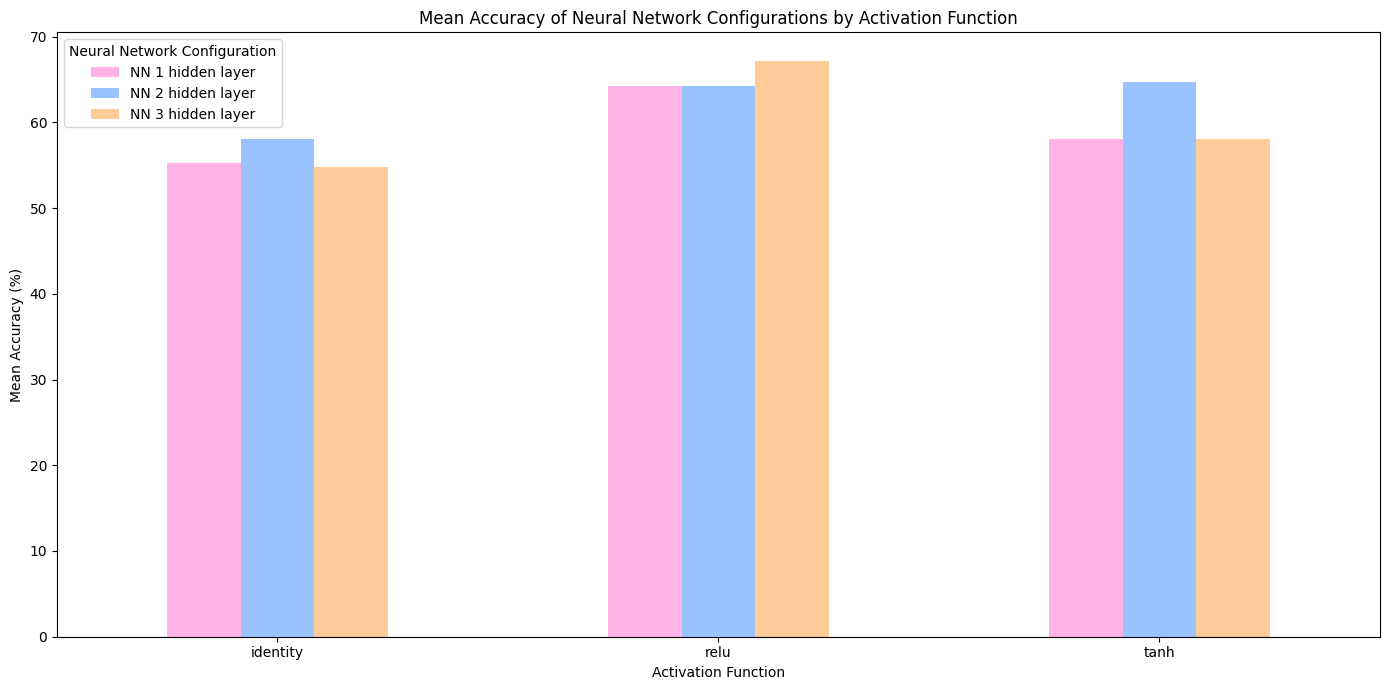

In [ ]:

pastel_colors = ['#ffb3e6', '#99c2ff', '#ffcc99']

pivot_df.plot(kind='bar', figsize=(14, 7), color=pastel_colors)

plt.title('Mean Accuracy of Neural Network Configurations by Activation Function')
plt.xlabel('Activation Function')
plt.ylabel('Mean Accuracy (%)')
plt.xticks(rotation=0)
plt.legend(title='Neural Network Configuration')
plt.tight_layout()

plt.show()

In [ ]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

activation_functions = ['relu',]

results_df = pd.DataFrame(index=[f'Fold {i}' for i in range(1, 6)] + ['Mean Accuracy'])

for activation in activation_functions:
    nn_custom = MLPClassifier(hidden_layer_sizes=(100, 50,25,),
                              activation=activation,
                              solver='adam',
                              random_state=42)

    cv_scores = cross_val_score(nn_custom, X_scaled, y, cv=5)
    mean_accuracy = np.mean(cv_scores)

    results_df[activation] = cv_scores.tolist() + [mean_accuracy]

print(results_df.T)

        Fold 1    Fold 2    Fold 3    Fold 4    Fold 5  Mean Accuracy
relu  0.571429  0.571429  0.714286  0.666667  0.833333       0.671429


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

nn_model_full = MLPClassifier(hidden_layer_sizes=(100, 50, 25), activation='relu', solver='adam', random_state=42)
nn_model_full.fit(X_scaled, y)

y_pred_full = nn_model_full.predict(X_scaled)

accuracy_full = accuracy_score(y, y_pred_full)
precision_full = precision_score(y, y_pred_full)
recall_full = recall_score(y, y_pred_full)
f1_full = f1_score(y, y_pred_full)
conf_matrix_full = confusion_matrix(y, y_pred_full)

accuracy_full, precision_full, recall_full, f1_full, conf_matrix_full

(1.0,
 1.0,
 1.0,
 1.0,
 array([[17,  0],
        [ 0, 16]]))

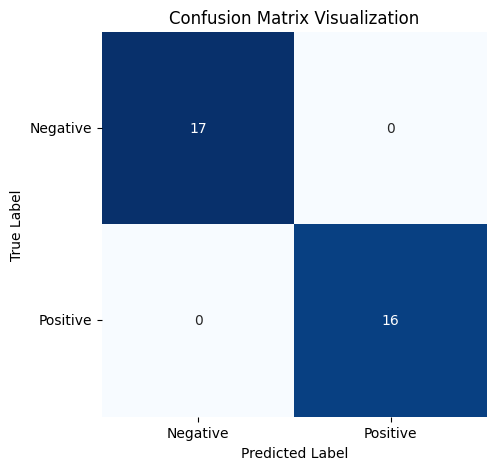

In [ ]:
import seaborn as sns
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_full, annot=True, fmt='d', cmap='Blues', square=True, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Visualization')
plt.xticks([0.5, 1.5], ['Negative', 'Positive'])
plt.yticks([0.5, 1.5], ['Negative', 'Positive'], rotation=0)
plt.show()